Table of content
1.Read and understand dataset
2.Data cleaning
	2.1 Find null
	2.2 Drop collumns with null
	2.3 Standardization data with numberical no null data in application_data
	2.4 Standardization data with numberical no null data in previous_application
    2.5 Fillna in application_data
	2.6 Fillna in previous_application
    2.7 Identify outliers
3.Data analysis
   	3.1 Imbalance analysis
   	3.2 Category var analysis 
    3.3 Numberic var analysis
    3.4 Merge datasets 
4.Conclusion       

# 1. Read and understand dataset

In [1417]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',150) 
pd.options.display.float_format = '{:,.2f}'.format

In [1418]:
dfa=pd.read_csv('application_data.csv')
dfp=pd.read_csv('previous_application.csv')

In [1419]:
dfa.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0

In [1420]:
dfp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.43","17,145.00","17,145.00",0.00,"17,145.00",SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,"365,243.00",-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,"25,188.62","607,500.00","679,671.00",NaN,"607,500.00",THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,"365,243.00",-134.00,916.00,"365,243.00","365,243.00",1.00
2,2523466,122040,Cash loans,"15,060.74","112,500.00","136,444.50",NaN,"112,500.00",TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,"365,243.00",-271.00,59.00,"365,243.00","365,243.00",1.00
3,2819243,176158,Cash loans,"47,041.33","450,000.00","470,790.00",NaN,"450,000.00",MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,"365,243.00",-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,"31,924.40","337,500.00","404,055.00",NaN,"337,500.00",THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [1421]:
print('shape of application_data :', dfa.shape)
print('shape of previous_application :', dfp.shape)

shape of application_data : (307511, 122)
shape of previous_application : (1670214, 37)


In [1422]:
dfa.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [1423]:
dfp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [1424]:
dfa.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,"307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,499.00","307,233.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","104,582.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,509.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","134,133.00","306,851.00","246,546.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","159,080.00","306,490.00","306,490.00","306,490.00","306,490.00","307,510.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00"
mean,"278,180.52",0.08,0.42,"168,797.92","599,026.00","27,108.57","538,396.21",0.02,"-16,037.00","63,815.05","-4,986.12","-2,994.20",12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,"102,790.18",0.27,0.72,"237,123.15","402,490.78","14,493.74","369,446.46",0.01,"4,363.99","141,275

In [1425]:
dfp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,"1,670,214.00","1,670,214.00","1,297,979.00","1,670,214.00","1,670,213.00","774,370.00","1,284,699.00","1,670,214.00","1,670,214.00","774,370.00","5,951.00","5,951.00","1,670,214.00","1,670,214.00","1,297,984.00","997,149.00","997,149.00","997,149.00","997,149.00","997,149.00","997,149.00"
mean,"1,923,089.14","278,357.17","15,955.12","175,233.86","196,114.02","6,697.40","227,847.28",12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,"342,209.86","13,826.27","33,767.77","76,582.40","81,992.34",0.33
std,"532,597.96","102,814.82","14,782.14","292,779.76","318,574.62","20,921.50","315,396.56",3.33,0.06,0.11,0.09,0.10,779.10,"7,127.44",14.57,"88,916.12","72,444.87","106,857.03","149,647.42","153,303.52",0.47
min,"1,000,001.00","100,001.00",0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,"-2,922.00",-1.00,0.00,"-2,922.00","-2,892.00","-2,801.00","-2,889.00","-2,874.00",0.00
25%,"1,461,857.25","189,329.00","6,321.78","18,720.00","24,160.50",0.00,"50,841.00",10.00,1.00,0.00,0.16,0.72,"-1,300.00",-1.00,6.00,"365,243.00","-1,628.00","-1,242.00","-1,314.00","-1,270.00",0.00
50%,"1,923,110.50","278,714.50","11,250.00","71,046.00","80,541.00","1,638.00","112,320.00",12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,"365,243.00",-831.00,-361.00,-537.00,-499.00,0.00
75%,"2,384,279.75","367,514.00","20,658.42","180,360.00","216,418.50","7,740.00","234,000.00",15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,"365,243.00",-411.00,129.00,-74.00,-44.00,1.00
max,"2,845,382.00","456,255.00","418,058.15","6,905,160.00","6,905,160.00","3,060,045.00","6,905,160.00",23.00,1.00,1.00,1.00,1.00,-1.00,"4,000,000.00",84.00,"365,243.00","365,243.00","365,243.00","365,243.00","365,243.00",1.00


# 2. Data Cleaning

#2.1 Find nulls

In [1426]:
#check percent of null in columms

dfachecknull=round(dfa.isna().sum()/len(dfa.index)*100,2)
dfachecknull

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [1427]:
#columns has null in dfa:
dfachecknull0=dfachecknull[dfachecknull>0]
print('in dfa there are ',len(dfachecknull0),'collums contain  null')
dfachecknull0

in dfa there are  64 collums contain  null


AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
OWN_CAR_AGE                    65.99
OCCUPATION_TYPE                31.35
EXT_SOURCE_1                   56.38
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
APARTMENTS_AVG                 50.75
BASEMENTAREA_AVG               58.52
YEARS_BEGINEXPLUATATION_AVG    48.78
YEARS_BUILD_AVG                66.50
COMMONAREA_AVG                 69.87
ELEVATORS_AVG                  53.30
ENTRANCES_AVG                  50.35
FLOORSMAX_AVG                  49.76
FLOORSMIN_AVG                  67.85
LANDAREA_AVG                   59.38
LIVINGAPARTMENTS_AVG           68.35
LIVINGAREA_AVG                 50.19
NONLIVINGAPARTMENTS_AVG        69.43
NONLIVINGAREA_AVG              55.18
APARTMENTS_MODE                50.75
BASEMENTAREA_MODE              58.52
YEARS_BEGINEXPLUATATION_MODE   48.78
YEARS_BUILD_MODE               66.50
COMMONAREA_MODE                69.87
ELEVATORS_MODE                 53.30
E

In [1428]:
dfpchecknull=round(dfp.isna().sum()/len(dfp.index)*100,2)
print(dfpchecknull)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
RATE_INTEREST_PRIMARY         99.64
RATE_INTEREST_PRIVILEGED      99.64
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

In [1429]:
#columns has null in dfp:
dfpchecknull0=dfpchecknull[dfpchecknull>0]
print('in dfp there are ',len(dfpchecknull0),'collums contain  null')
dfpchecknull0

in dfp there are  15 collums contain  null


AMT_ANNUITY                 22.29
AMT_DOWN_PAYMENT            53.64
AMT_GOODS_PRICE             23.08
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
NAME_TYPE_SUITE             49.12
CNT_PAYMENT                 22.29
PRODUCT_COMBINATION          0.02
DAYS_FIRST_DRAWING          40.30
DAYS_FIRST_DUE              40.30
DAYS_LAST_DUE_1ST_VERSION   40.30
DAYS_LAST_DUE               40.30
DAYS_TERMINATION            40.30
NFLAG_INSURED_ON_APPROVAL   40.30
dtype: float64

Comment: 
There are plenty of missing values in collumns in dfa that > 40%, also some in dfp.. let's sort them out

In [1430]:
dfachecknull40=dfachecknull[dfachecknull>40]
print('in dfa there are ',len(dfachecknull40),'collums contain >40% null')
dfachecknull40

in dfa there are  49 collums contain >40% null


OWN_CAR_AGE                    65.99
EXT_SOURCE_1                   56.38
APARTMENTS_AVG                 50.75
BASEMENTAREA_AVG               58.52
YEARS_BEGINEXPLUATATION_AVG    48.78
YEARS_BUILD_AVG                66.50
COMMONAREA_AVG                 69.87
ELEVATORS_AVG                  53.30
ENTRANCES_AVG                  50.35
FLOORSMAX_AVG                  49.76
FLOORSMIN_AVG                  67.85
LANDAREA_AVG                   59.38
LIVINGAPARTMENTS_AVG           68.35
LIVINGAREA_AVG                 50.19
NONLIVINGAPARTMENTS_AVG        69.43
NONLIVINGAREA_AVG              55.18
APARTMENTS_MODE                50.75
BASEMENTAREA_MODE              58.52
YEARS_BEGINEXPLUATATION_MODE   48.78
YEARS_BUILD_MODE               66.50
COMMONAREA_MODE                69.87
ELEVATORS_MODE                 53.30
ENTRANCES_MODE                 50.35
FLOORSMAX_MODE                 49.76
FLOORSMIN_MODE                 67.85
LANDAREA_MODE                  59.38
LIVINGAPARTMENTS_MODE          68.35
L

Comment: 
There are plenty columns has missing values >40% in dfa, most of them belong to customer apartment and living area info

In [1431]:
dfpchecknull40=dfpchecknull[dfpchecknull>40]
print('in dfp there are ',len(dfpchecknull40),'collums contain >40% null')
dfpchecknull40

in dfp there are  11 collums contain >40% null


AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
NAME_TYPE_SUITE             49.12
DAYS_FIRST_DRAWING          40.30
DAYS_FIRST_DUE              40.30
DAYS_LAST_DUE_1ST_VERSION   40.30
DAYS_LAST_DUE               40.30
DAYS_TERMINATION            40.30
NFLAG_INSURED_ON_APPROVAL   40.30
dtype: float64

Comment:
There are 11 columns has missing values >40% in dfp, 2 columms'RATE_INTEREST_PRIMARY' and 'RATE_INTEREST_PRIVILEGED ' has almost no info at all, we can drop them

#2.2 Drop collumns with null % > 40

In [1433]:
#drop 49 columns with >40% null in dfa:
dfa1= dfa.drop(dfachecknull40.index,axis=1)
dfa1.shape

(307511, 73)

In [1434]:
#drop 11 columns with >40% null in dfb:
dfp1= dfp.drop(dfpchecknull40.index,axis=1)
dfp1.shape

(1670214, 26)

In [1435]:
#check null left of dfa

dfa1checknull=round(dfa1.isna().sum()/len(dfa1.index)*100,2)
dfa1checknull0=dfa1checknull[dfa1checknull>0]
dfa1checknull0

AMT_GOODS_PRICE               0.09
NAME_TYPE_SUITE               0.42
OCCUPATION_TYPE              31.35
EXT_SOURCE_2                  0.21
EXT_SOURCE_3                 19.83
OBS_30_CNT_SOCIAL_CIRCLE      0.33
DEF_30_CNT_SOCIAL_CIRCLE      0.33
OBS_60_CNT_SOCIAL_CIRCLE      0.33
DEF_60_CNT_SOCIAL_CIRCLE      0.33
AMT_REQ_CREDIT_BUREAU_HOUR   13.50
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_YEAR   13.50
dtype: float64

In [1436]:
#
dfa1[dfa1checknull0.index].describe()

,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,"307,233.00","306,851.00","246,546.00","306,490.00","306,490.00","306,490.00","306,490.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00"
mean,"538,396.21",0.51,0.51,1.42,0.14,1.41,0.10,0.01,0.01,0.03,0.27,0.27,1.90
std,"369,446.46",0.19,0.19,2.40,0.45,2.38,0.36,0.08,0.11,0.20,0.92,0.79,1.87
min,"40,500.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"238,500.00",0.39,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"450,000.00",0.57,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,"679,500.00",0.66,0.67,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,"4,050,000.00",0.85,0.90,348.00,34.00,344.00,24.00,4.00,9.00,8.00,27.00,261.00,25.00


In [1437]:
#create list of unnessesrary collumns:
dfauncol=[]

In [1438]:
#Check corr between target and other columns
#category collums:'NAME_TYPE_SUITE','OCCUPATION_TYPE'
#numberical columns: 'AMT_GOODS_PRICE','EXT_SOURCE_2,'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'

<AxesSubplot:>

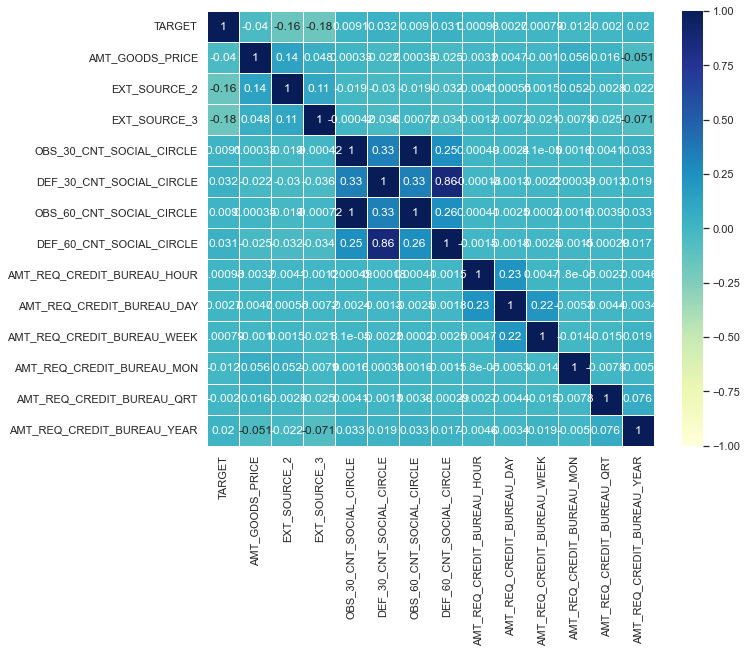

In [1439]:
#check the corr of target with numberical data 
plt.figure(figsize=(10,8))
c1= dfa1[['TARGET','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]
corr = c1.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, vmin= -1, vmax= 1, linewidths=.5)


comment: 
As we can see there is no corr between target and 'EXT_SOURCE_2','EXT_SOURCE_3', let's drop them

In [1440]:
dfauncol= dfauncol+['EXT_SOURCE_2','EXT_SOURCE_3']

<AxesSubplot:>

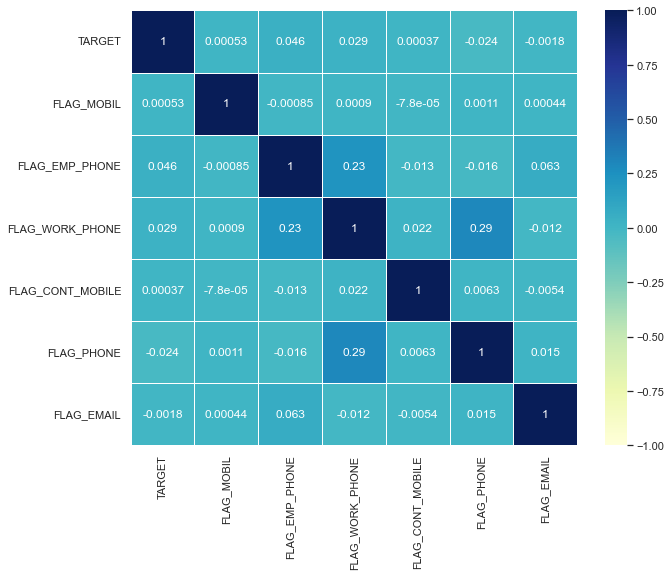

In [1441]:
#check corr betwen Flag -phone and target
plt.figure(figsize=(10,8))
c2= dfa1[['TARGET','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL']]
corr = c2.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, vmin= -1, vmax= 1, linewidths=.5)

Comment: 
As we can see, there is no corr between 6 flag  phone mobile with target. LET'S DROP THEM 

In [1442]:
dfauncol= dfauncol+['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL']


<AxesSubplot:>

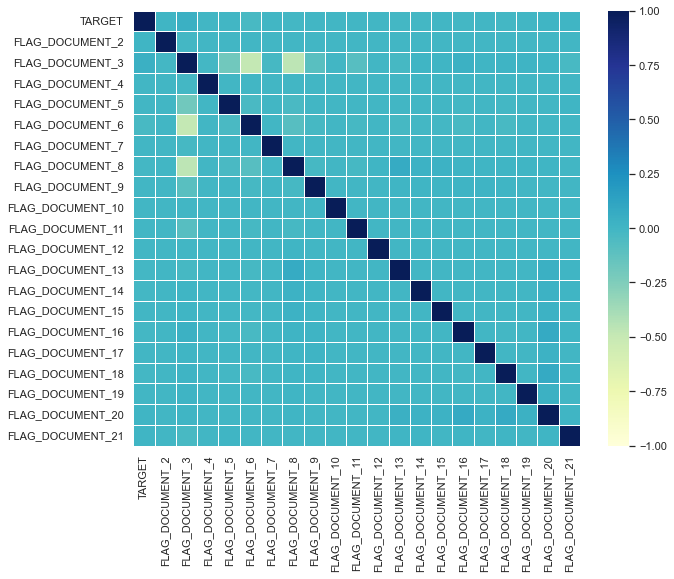

In [1443]:
plt.figure(figsize=(10,8))
c3= dfa1[['TARGET',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]
corr = c3.corr()
sns.heatmap(corr, cmap = 'YlGnBu', vmin= -1, vmax= 1, linewidths=.5)

Comment: 
All these flag_document has no corr with target.delete them

In [1444]:
dfauncol= dfauncol+['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

<AxesSubplot:>

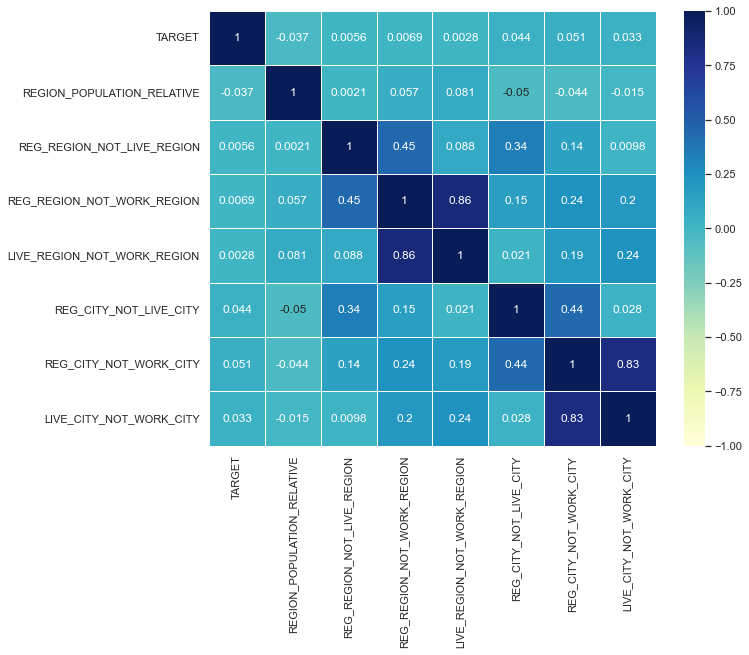

In [1445]:
plt.figure(figsize=(10,8))
c4= dfa1[['TARGET','REGION_POPULATION_RELATIVE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']]
corr = c4.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, vmin= -1, vmax= 1, linewidths=.5)

Comment:
we can see NONE of these region, city ino has high corr with target, can delete them

In [1447]:
dfauncol= dfauncol+['REGION_POPULATION_RELATIVE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

In [1448]:
#now drop those info below from dfa
dfa1.drop(labels=dfauncol,axis=1,inplace= True)

In [1449]:
dfp1=dfp1.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'],axis=1)

In [1450]:
#dfa after deleting unnecessary collumns
dfa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [1451]:
#dfp after deleting unnecessary columns
dfp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

#2.3 Standardization data with numberical no null data in application_data

Comment:
Day info from DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH is negative, it's wrong, have to be positive

In [1452]:
#DAY_INFO to positive
dfa1day= ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in dfa1day:
    dfa1[i]=abs(dfa1[i])

In [1453]:
#DAY_BIRTH -> bin
dfa1['AGE']=dfa1['DAYS_BIRTH']//365
bins = [0,20,30,40,50,100]
labels=['<20','20-30','30-40','40-50','>50']
dfa1['AGEGROUP']=pd.cut(dfa1['AGE'],bins=bins,labels=labels)

In [1454]:
#CODE_GENDER
dfa1.CODE_GENDER.value_counts()
ratioF =round(dfa1[dfa1['CODE_GENDER']=='F'].shape[0]/len(dfa1['CODE_GENDER'])*100,2)
ratioM= 100- ratioF
print(dfa1.CODE_GENDER.value_counts())
print('percent of female:',ratioF)
print('percent of female:',ratioM) 

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
percent of female: 65.83
percent of female: 34.17


In [1455]:
#seem like 'XNA' is some mis typo info, i'll set those 4 to female which is higher than male and 4 wont affect the ratio much
dfa1.CODE_GENDER=dfa1.CODE_GENDER.str.replace('XNA','F')

In [1456]:
dfa1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [1457]:
dfa1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,"307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,499.00","307,233.00","307,511.00","307,511.00","307,511.00","307,511.00","307,509.00","307,511.00","307,511.00","307,511.00","306,490.00","306,490.00","306,490.00","306,490.00","307,510.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00","307,511.00"
mean,"278,180.52",0.08,0.42,"168,797.92","599,026.00","27,108.57","538,396.21","16,037.00","67,724.74","4,986.12","2,994.20",2.15,2.05,2.03,12.06,1.42,0.14,1.41,0.10,-962.86,0.01,0.01,0.03,0.27,0.27,1.90,43.44
std,"102,790.18",0.27,0.72,"237,123.15","402,490.78","14,493.74","369,446.46","4,363.99","139,443.75","3,522.89","1,509.45",0.91,0.51,0.50,3.27,2.40,0.45,2.38,0.36,826.81,0.08,0.11,0.20,0.92,0.79,1.87,11.95
min,"100,002.00",0.00,0.00,"25,650.00","45,000.00","1,615.50","40,500.00","7,489.00",0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,"-4,292.00",0.00,0.00,0.00,0.00,0.00,0.00,20.00
25%,"189,145.50",0.00,0.00,"112,500.00","270,000.00","16,524.00","238,500.00","12,413.00",933.00,"2,010.00","1,720.00",2.00,2.00,2.00,10.00,0.00,0.00,0.00,0.00,"-1,570.00",0.00,0.00,0.00,0.00,0.00,0.00,34.00
50%,"278,202.00",0.00,0.00,"147,150.00","513,531.00","24,903.00","450,000.00","15,750.00","2,219.00","4,504.00","3,254.00",2.00,2.00,2.00,12.00,0.00,0.00,0.00,0.00,-757.00,0.00,0.00,0.00,0.00,0.00,1.00,43.00
75%,"367,142.50",0.00,1.00,"202,500.00","808,650.00","34,596.00","679,500.00","19,682.00","5,707.00","7,479.50","4,299.00",3.00,2.00,2.00,14.00,2.00,0.00,2.00,0.00,-274.00,0.00,0.00,0.00,0.00,0.00,3.00,53.00
max,"456,255.00",1.00,19.00,"117,000,000.00","4,050,000.00","258,025.50","4,050,000.00","25,229.00","365,243.00","24,672.00","7,197.00",20.00,3.00,3.00,23.00,348.00,34.00,344.00,24.00,0.00,4.00,9.00,8.00,27.00,261.00,25.00,69.00


In [1458]:
#'AMT_INCOME_TOTAL'-> bin
dfa1['AMT_INCOME_TOTAL_']=dfa1['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,50]
labels = ['<100K','100K-200K', '200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K',
       '800K-900K','900K-1M', '>1M']

dfa1['AMT_INCOME_RANGE']=pd.cut(dfa1['AMT_INCOME_TOTAL_'],bins=bins,labels=labels)
dfa1=dfa1.drop(columns=['AMT_INCOME_TOTAL_'])

In [1459]:
#'ATM_CREDIT_RANGE'-> bin
dfa1['AMT_CREDIT_']=dfa1['AMT_CREDIT']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,50]
labels= ['<100K','100K-200K', '200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K',
       '800K-900K','900K-1M', '>1M']

dfa1['AMT_CREDIT_RANGE']=pd.cut(dfa1['AMT_CREDIT_'],bins=bins,labels=labels)
dfa1=dfa1.drop(columns=['AMT_CREDIT_'])

In [1461]:
#'DAYS_EMPLOYED' ->YEARS -> bin
dfa1['YEARS_EMPLOYED_'] = dfa1['DAYS_EMPLOYED'] / 365
bins = [-1,3,5,10,20,30,40,50,60,1200]
labels = ['<3','3-5','5-10','10-20','20-30','30-40','40-50','50-60','>60']

dfa1['YEARS_EMPLOYED']=pd.cut(dfa1['YEARS_EMPLOYED_'],bins=bins,labels=labels)
dfa1=dfa1.drop(columns=['YEARS_EMPLOYED_'])

In [1462]:
dfa1.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_REQ_CREDIT_BUREAU_HOUR          5
AGEGROUP                            5
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
YEARS_EMPLOYED                      8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
AMT_INCOME_RANGE                   11
AMT_CREDIT_RANGE                   11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [1463]:
dfa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [1464]:
#numberical columns are in int and float
#let's change objects to category
dfa1_cate=['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
'NAME_TYPE_SUITE','NAME_INCOME_TYPE', 
'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 
'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE']
for x in dfa1_cate:
    dfa1[x] =pd.Categorical(dfa1[x])

In [1465]:
dfa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

#2.4 Standardization data with numberical no null data in previous_application

In [1466]:
dfp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [1467]:
dfp1.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [1468]:
#day -> positive
dfp1['DAYS_DECISION']=abs(dfp1['DAYS_DECISION'])

In [1469]:
#change object -> category
dfp1_cate = ['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON',
             'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
             'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',]

for y in dfp1_cate:
    dfp1[y] = pd.Categorical(dfp1[y])


In [1470]:
dfp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

#2.5 Fillna in application_data

In [1471]:
dfa1checknull=round(dfa1.isna().sum()/len(dfa1.index)*100,2)
dfa1checknull

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE               31.35
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
ORGANIZATION_TYPE              0.00
OBS_30_CNT_SOCIAL_CIRCLE    

In [1472]:
#fillna for NAME_TYPE_SUITE     (category)           0.42 -> mode

dfa1['NAME_TYPE_SUITE'].fillna((dfa1['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [1473]:
dfa1['NAME_TYPE_SUITE'].isna().any()

False

In [1474]:
#fillna for OCCUPATION_TYPE       (category)           31.35 -> mode
#since the % of null is high so we're gonna set a new category
dfa1['OCCUPATION_TYPE'] = dfa1['OCCUPATION_TYPE'].cat.add_categories('Unknown')


In [1475]:
dfa1['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

In [1476]:
#fillna for social circle  (numberical)  0.33% -> median
dfa1[['OBS_30_CNT_SOCIAL_CIRCLE',      
'DEF_30_CNT_SOCIAL_CIRCLE',      
'OBS_60_CNT_SOCIAL_CIRCLE',       
'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,"306,490.00","306,490.00","306,490.00","306,490.00"
mean,1.42,0.14,1.41,0.10
std,2.40,0.45,2.38,0.36
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,2.00,0.00,2.00,0.00
max,348.00,34.00,344.00,24.00


In [1477]:
value =['OBS_30_CNT_SOCIAL_CIRCLE',      
'DEF_30_CNT_SOCIAL_CIRCLE',      
'OBS_60_CNT_SOCIAL_CIRCLE',       
'DEF_60_CNT_SOCIAL_CIRCLE']
for i in value:
    dfa1[i].fillna(dfa1[i].median(),inplace= True)

In [1478]:
dfa1[['OBS_30_CNT_SOCIAL_CIRCLE',      
'DEF_30_CNT_SOCIAL_CIRCLE',      
'OBS_60_CNT_SOCIAL_CIRCLE',       
'DEF_60_CNT_SOCIAL_CIRCLE']].isna().any()

OBS_30_CNT_SOCIAL_CIRCLE    False
DEF_30_CNT_SOCIAL_CIRCLE    False
OBS_60_CNT_SOCIAL_CIRCLE    False
DEF_60_CNT_SOCIAL_CIRCLE    False
dtype: bool

In [1479]:
#fillna for AMT_REQ_CREDIT   (numberical)   0.13   -> median

dfa1[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
      'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,"265,992.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00"
mean,0.01,0.01,0.03,0.27,0.27,1.90
std,0.08,0.11,0.20,0.92,0.79,1.87
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,0.00,0.00,0.00,0.00,3.00
max,4.00,9.00,8.00,27.00,261.00,25.00


In [1480]:
value = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for i in value:
    dfa1[i].fillna(dfa1[i].median(),inplace = True)

In [1481]:
round(dfa1.isna().sum()/len(dfa1.index)*100,2)

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.09
NAME_TYPE_SUITE               0.00
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
DAYS_BIRTH                    0.00
DAYS_EMPLOYED                 0.00
DAYS_REGISTRATION             0.00
DAYS_ID_PUBLISH               0.00
OCCUPATION_TYPE               0.00
CNT_FAM_MEMBERS               0.00
REGION_RATING_CLIENT          0.00
REGION_RATING_CLIENT_W_CITY   0.00
WEEKDAY_APPR_PROCESS_START    0.00
HOUR_APPR_PROCESS_START       0.00
ORGANIZATION_TYPE             0.00
OBS_30_CNT_SOCIAL_CIRCLE      0.00
DEF_30_CNT_SOCIAL_CI

Comment: 
Other columns left take a small amount of %, can be ignored

#2.6 Fillna in previous_application

In [1482]:
round(dfp1.isna().sum()/len(dfp1.index)*100,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY              22.29
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE          23.08
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT              22.29
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
dtype: float64

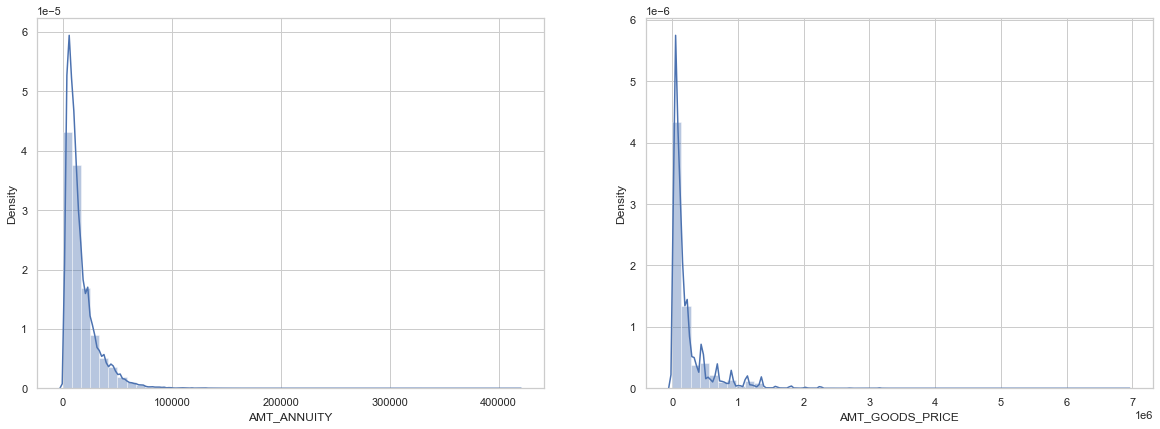

In [1483]:

value= ['AMT_ANNUITY', 'AMT_GOODS_PRICE']

plt.figure(figsize = (20, 15))
for i in enumerate(value):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(dfp1[i[1]])
plt.show()

Comment: 
All these data are left skew, has high peak at left side and nothing on right side, outlinters are present -> fillna with mode

In [1484]:
dfp1['AMT_ANNUITY'].fillna(dfp1['AMT_ANNUITY'].mode()[0],inplace= True)
dfp1['AMT_GOODS_PRICE'].fillna(dfp1['AMT_GOODS_PRICE'].mode()[0],inplace= True)


In [1485]:
#CNT_PAYMENT, maybe null value means loan not started yet, so set as 0
dfp1['CNT_PAYMENT'].fillna(0,inplace= True)

In [1486]:
round(dfp1.isna().sum()/len(dfp1.index)*100,2)

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.00
AMT_ANNUITY              0.00
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE          0.00
NAME_CASH_LOAN_PURPOSE   0.00
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_PAYMENT_TYPE        0.00
CODE_REJECT_REASON       0.00
NAME_CLIENT_TYPE         0.00
NAME_GOODS_CATEGORY      0.00
NAME_PORTFOLIO           0.00
NAME_PRODUCT_TYPE        0.00
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
NAME_SELLER_INDUSTRY     0.00
CNT_PAYMENT              0.00
NAME_YIELD_GROUP         0.00
PRODUCT_COMBINATION      0.02
dtype: float64

Comment: 
PRODUCT_COMBINATION      0.02 is small, can be ignored

#2.7 Identify outliers

outliers of dfa

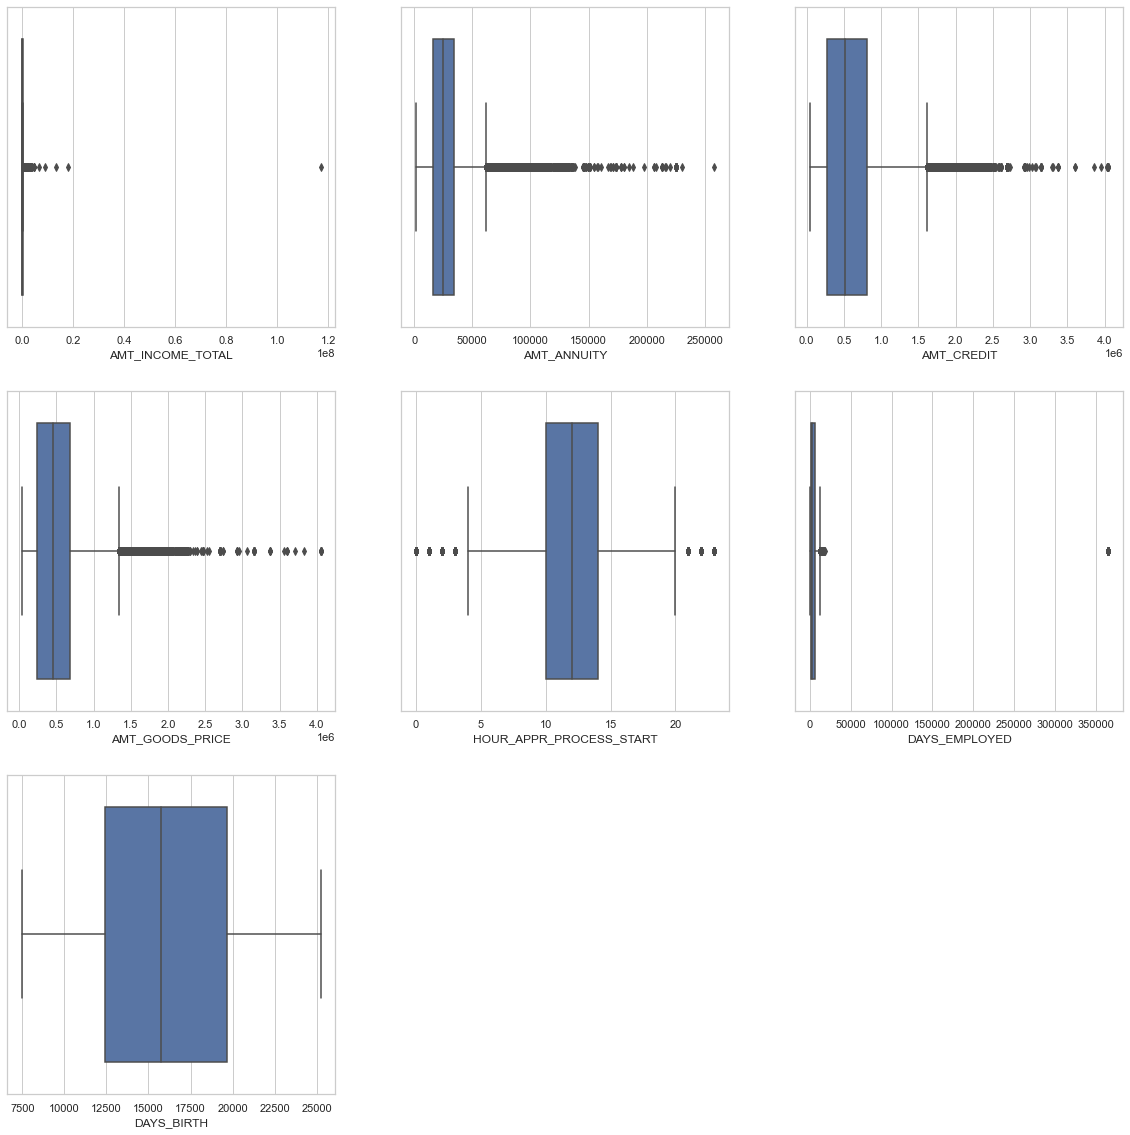

In [1488]:
value=['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT',
    'AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START',
       'DAYS_EMPLOYED','DAYS_BIRTH']
plt.figure(figsize = (20,20))
for i in enumerate(value):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = dfa1)
plt.show()

#Comment:
AMT_INCOME_TOTAL,AMT_ANNUITY has some or little outlier, left skew

AMT_CREDIT, AMT_GOODS_PRICE  has more outliers, and also left skew

HOUR_APPR_PROCESS_START is even, also has little outlier in both left and right side

DAYS_EMPLOYED has a outlier = 365234 ? which is wrong,maybe a mis typo

DAYS_BIRTH has no outlier at all

In [1490]:
dfa1[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT',
    'AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START',
       'DAYS_EMPLOYED','DAYS_BIRTH']].describe()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,DAYS_EMPLOYED,DAYS_BIRTH
count,"307,511.00","307,499.00","307,511.00","307,233.00","307,511.00","307,511.00","307,511.00"
mean,"168,797.92","27,108.57","599,026.00","538,396.21",12.06,"67,724.74","16,037.00"
std,"237,123.15","14,493.74","402,490.78","369,446.46",3.27,"139,443.75","4,363.99"
min,"25,650.00","1,615.50","45,000.00","40,500.00",0.00,0.00,"7,489.00"
25%,"112,500.00","16,524.00","270,000.00","238,500.00",10.00,933.00,"12,413.00"
50%,"147,150.00","24,903.00","513,531.00","450,000.00",12.00,"2,219.00","15,750.00"
75%,"202,500.00","34,596.00","808,650.00","679,500.00",14.00,"5,707.00","19,682.00"
max,"117,000,000.00","258,025.50","4,050,000.00","4,050,000.00",23.00,"365,243.00","25,229.00"


outliners of dfp

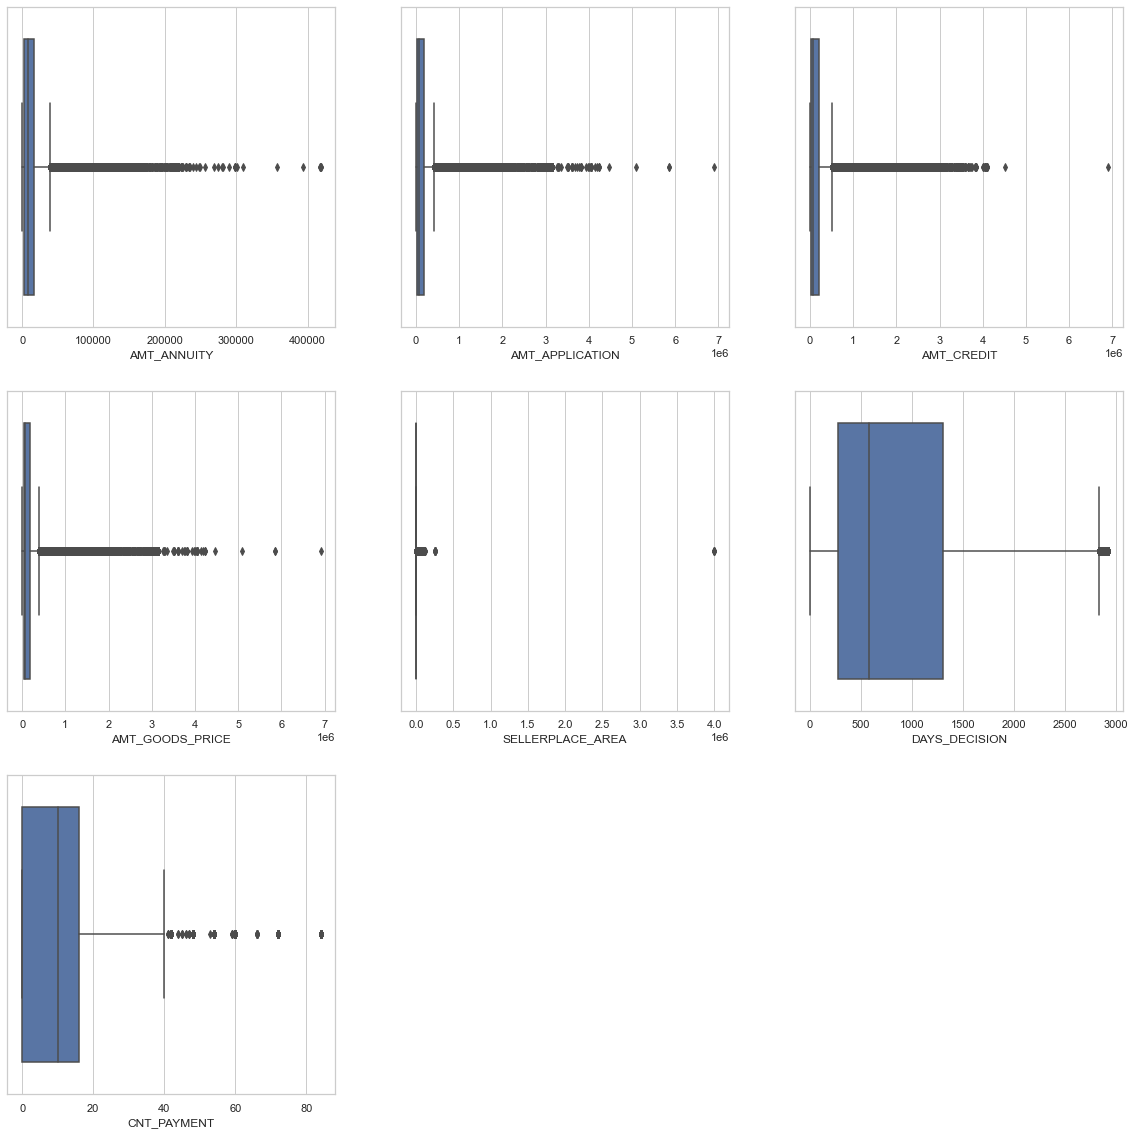

In [1492]:
value=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT',
       'AMT_GOODS_PRICE','SELLERPLACE_AREA',
      'DAYS_DECISION','CNT_PAYMENT']
plt.figure(figsize = (20,20))
for i in enumerate(value):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = dfp1)
plt.show()

Comment:
AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have pletnty of outliers and too left skew, cant even see the box

SELLERPLACE_AREA has few outliner on right side but with significant different from others

DAYS_DECISION has just a bit of outliner 

CNT_PAYMENT has few outlier

In [1493]:
dfp1[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT',
       'AMT_GOODS_PRICE','SELLERPLACE_AREA',
      'DAYS_DECISION','CNT_PAYMENT']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,DAYS_DECISION,CNT_PAYMENT
count,"1,670,214.00","1,670,214.00","1,670,213.00","1,670,214.00","1,670,214.00","1,670,214.00","1,670,214.00"
mean,"12,900.71","175,233.86","196,114.02","185,642.89",313.95,880.68,12.48
std,"14,224.78","292,779.76","318,574.62","287,141.32","7,127.44",779.10,14.48
min,0.00,0.00,0.00,0.00,-1.00,1.00,0.00
25%,"2,250.00","18,720.00","24,160.50","45,000.00",-1.00,280.00,0.00
50%,"8,250.25","71,046.00","80,541.00","71,050.50",3.00,581.00,10.00
75%,"16,824.03","180,360.00","216,418.50","180,405.00",82.00,"1,300.00",16.00
max,"418,058.15","6,905,160.00","6,905,160.00","6,905,160.00","4,000,000.00","2,922.00",84.00


# 3. Data analysis

#3.1 Imbalance analysis

In [1494]:
#devide the  dfa1 to 2 sets of defaulters and repayers
target0=dfa1.loc[dfa1['TARGET']==0]
target1=dfa1.loc[dfa1['TARGET']==1]

In [1495]:
#% of each in total
targettotal=len(target0)+len(target1)
target0percent=round((len(target0)/targettotal*100),2)
target1percent=round((len(target1)/targettotal*100),2)

print('percent of customer pay loan:',target0percent,'%')
print('percent of customer have not paid loan:',target1percent,'%')

percent of customer pay loan: 91.93 %
percent of customer have not paid loan: 8.07 %


<AxesSubplot:ylabel='TARGET'>

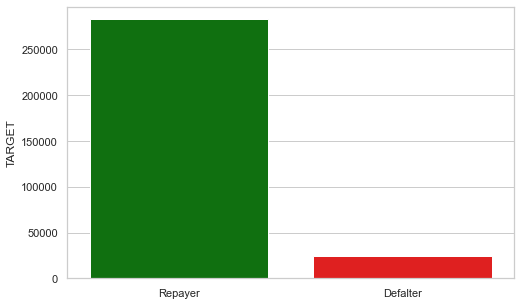

In [1496]:
plt.figure(figsize=(8,5))
x=['Repayer','Defalter']
y='TARGET'
data= dfa1['TARGET'].value_counts().reset_index()
sns.barplot(x,y,data=data,palette=['green','red'])

In [1497]:
# calculate imbalance percentage
imbratio= round(len(target0)/len(target1),2)
print('Imbalance Ratio betwen repayer and defaulter:', imbratio,'%')

Imbalance Ratio betwen repayer and defaulter: 11.39 %


#3.2 Category var analysis 

#3.2.1 Category var analysis (univariate)

#Comment:
charts will show repayer and defaulter % in each categorical variables  and show the % defaulter in each value of variables

In [1498]:
def univariate_categorical(col,ylog=False,label_rotation= False):
    temp = dfa1[col].value_counts()
    df1 = pd.DataFrame({col: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_per = dfa1[[col, 'TARGET']].groupby([col],as_index=False).mean()
    cat_per["TARGET"] = cat_per['TARGET']*100
    cat_per.sort_values(by='TARGET', ascending=False, inplace=True)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

        
    #Count plot of categorical column
    
    s = sns.countplot(ax=ax1, 
                    x = col, 
                    data=dfa1,
                    hue ="TARGET",
                    order=cat_per[col],
                    palette=['green','red'])
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    ax1.set_title(col) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)")
    

    #Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = col, 
                    y='TARGET',  
                    data=cat_per,
                    order=cat_per[col],
                    palette='Paired')
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    plt.ylabel('Percent of Defaulters [%]')
    ax2.set_title(col + " Defaulter %")
    
    plt.show()

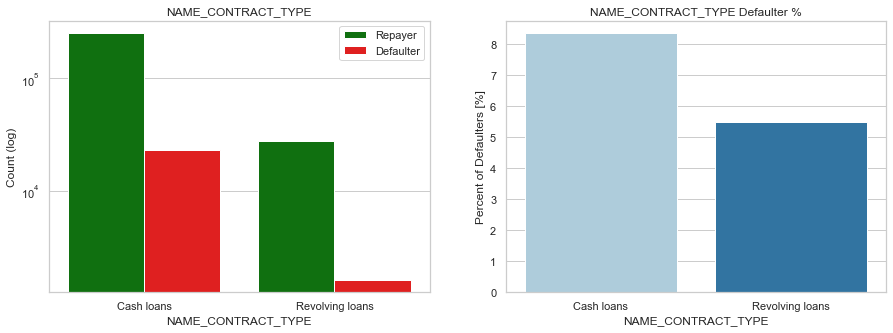

In [1499]:
a=['NAME_CONTRACT_TYPE']
univariate_categorical(a[0],True)

COMMENT: 
The defaulters in cashloan take up a huge amount, almost = 50% of repayer. On the other hand, in revoling loans, it takes up just a small amount.


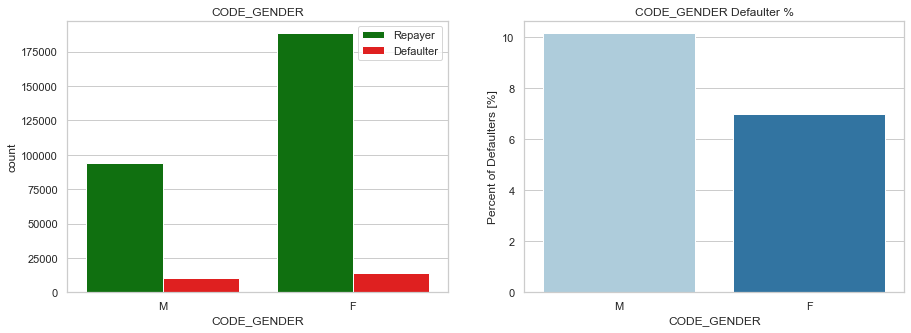

In [1500]:
univariate_categorical('CODE_GENDER')

COMMENT: 
Female tend to pay loan more than men and more, almost double from amount of men payment. However % of womend in defaulter is about 60% of men

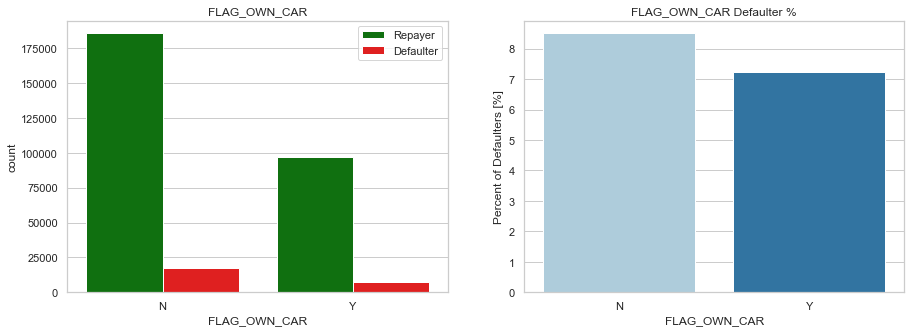

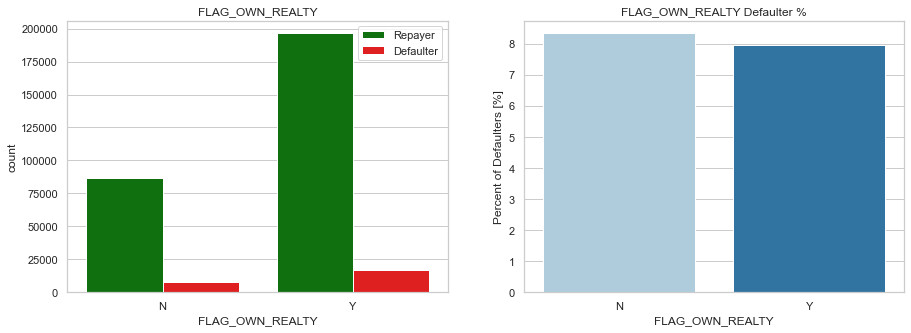

In [1501]:
c=['FLAG_OWN_CAR','FLAG_OWN_REALTY']
for i in c:
    univariate_categorical(i)

#COMMENT:

Amount of customer who own car is less about half of those who dont and overall this aspect does not relate much in reason of default, however those does not own any car tend to pay late than other but the difference is high

Most of customers we have here own a realestate, about 2/3 total, and eventualy defaulters in this sector are higher than in those who does not own a house. Look at % in defaulters, there is not much different between


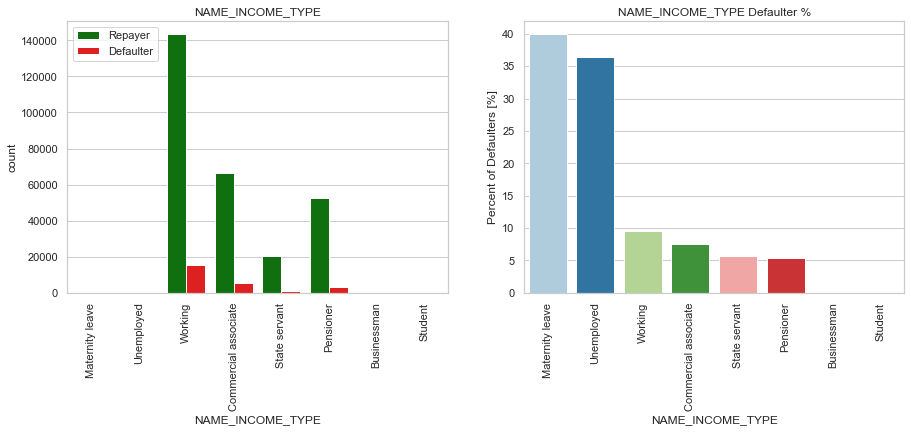

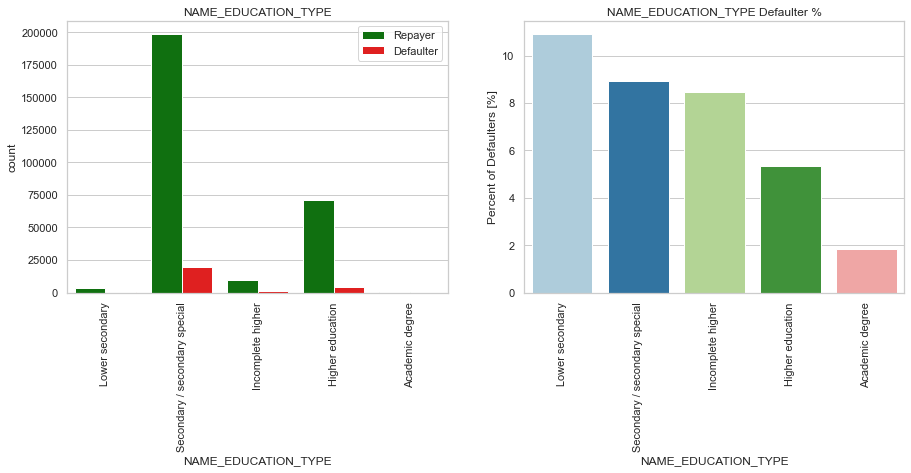

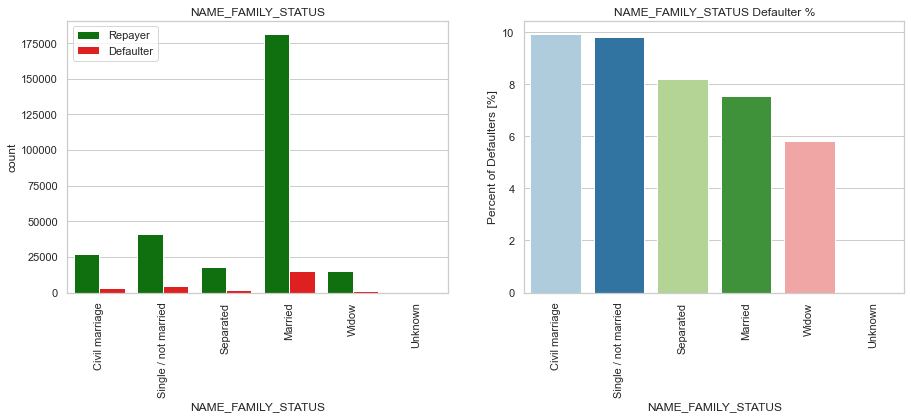

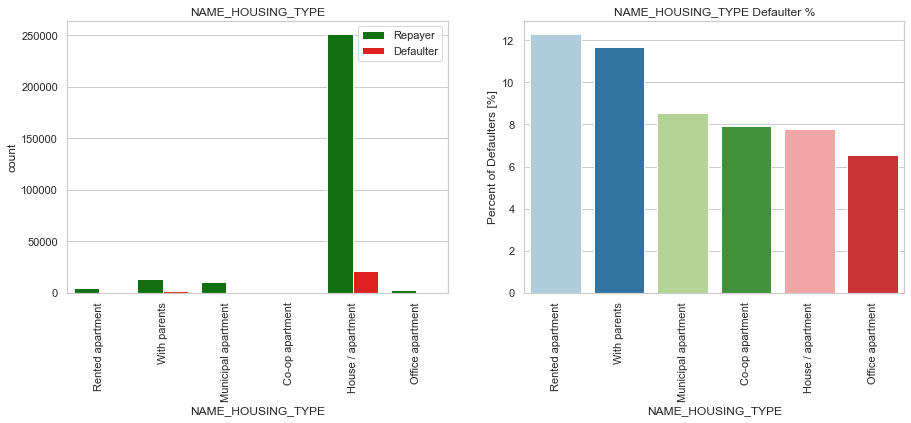

In [1502]:
d=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for y in d:
    univariate_categorical(y,False,True)

COMMENT:

Those that are unemployeed and maternity leave take up a significant % in defaulters - which can be easy to understand - as they dont have stable or average income. customers who are Workering and commercial associate take most amount in repayer

Customers who has education as lower take largest % in defaulters = 11% , next is secondary = 9%, eventhough the number of defaulter in lower secondary is not large (< 1000) when the secondary is almost = 25K. Hower the repayers in secondary is almost 200k, when in lower is < 1k. Most of repayer are secondary and in highschool

More than 175k repayers is married while single is < 50K and civil marriage is = 25k and other <15K .But the percentage of civil and single are highest.

Those who live in houses has highest amount in repayer with > 250k , while other < 15k, but rental apartment customer  take > 12% in defaulter while house/apartment is lex than 8%, also those live with family take more than 11% in defaulters.

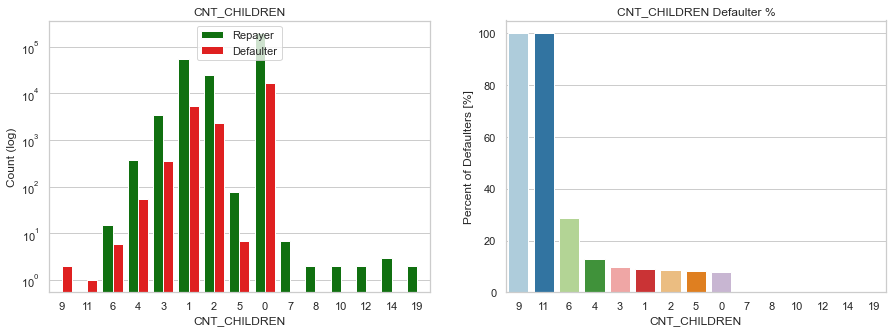

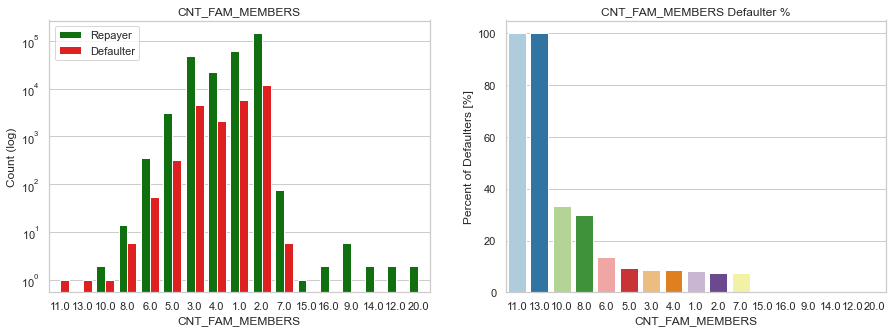

In [1503]:
e=['CNT_CHILDREN','CNT_FAM_MEMBERS']
for u in e:
    univariate_categorical(u,True)

COMMENT:

Most of repayers has no child or just 1-3 childrens and in the family of  1-4. Just very less amount of family of 11-13 people and has 9-11 kids but all of them are defaulters

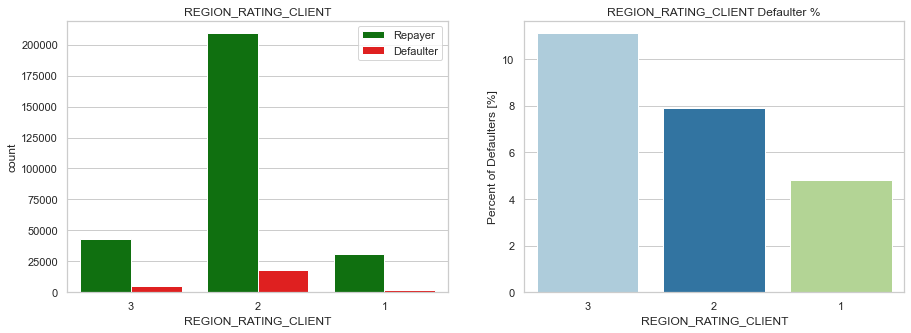

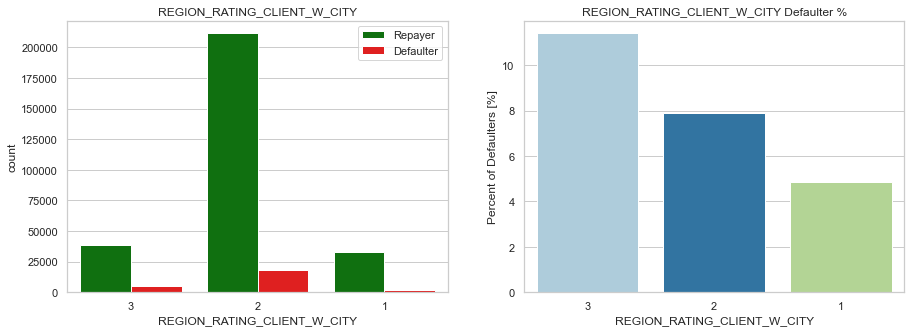

In [1504]:
f=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
for t in f:
    univariate_categorical(t)

COMMENT:

Customers who live at city with rate 3 more to be the defaulters than other, next is 2 and than 1. However, rating 2 customers has highest in repayer, is > 200k, while other <40k.

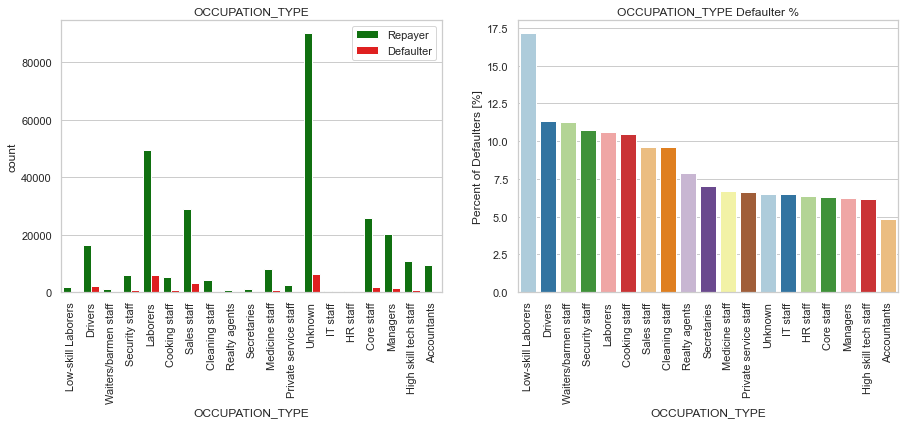

In [1505]:
univariate_categorical('OCCUPATION_TYPE',False,True)

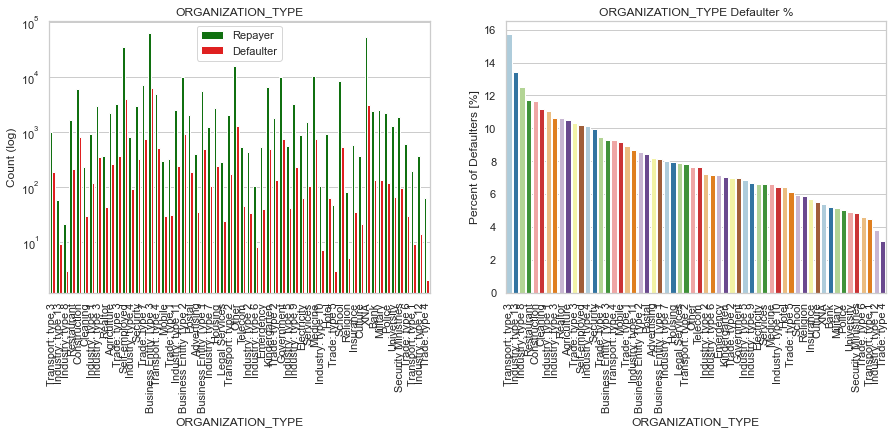

In [1506]:
univariate_categorical('ORGANIZATION_TYPE',True,True)

#COMMENT: 

Low skill labor, driver, waiter, sercurity staff, cooking staff, cleaning staff more to be defaulf, also those work in transport, industry, restaurant 

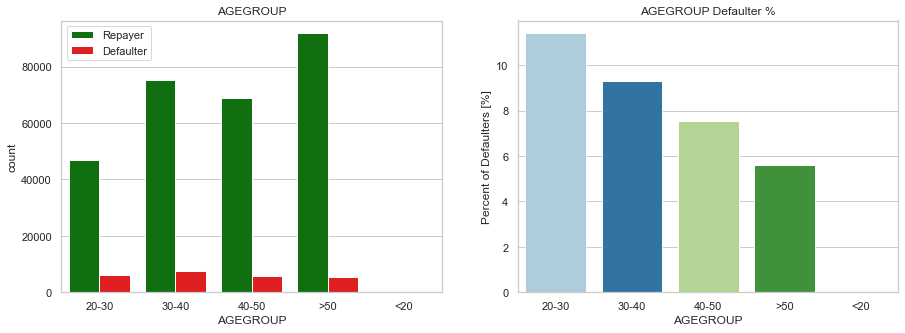

In [1507]:
univariate_categorical("AGEGROUP")

COMMENT: 

Those in age 20-40 default the most, most repayers are in their 50, <20 has very less application.

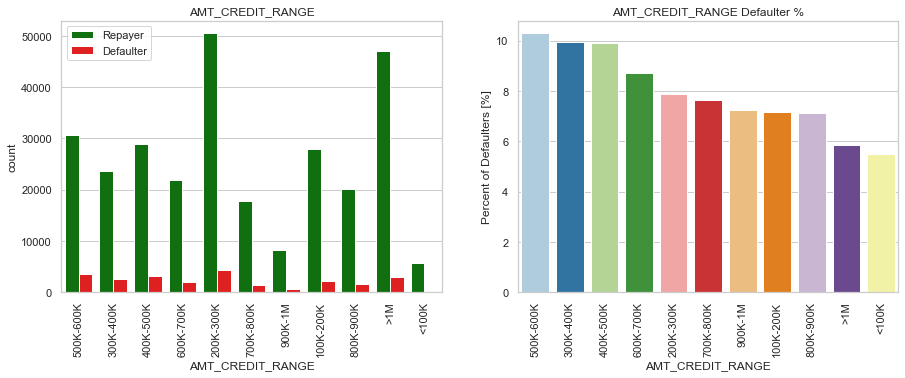

In [1508]:
univariate_categorical('AMT_CREDIT_RANGE',False,True)

COMMENT: 
Credit range from 300-600k default most, most repayers are in range > 1M AND <100K. at range 200-300k also has high value in repayers but at the same time also high in defaulters

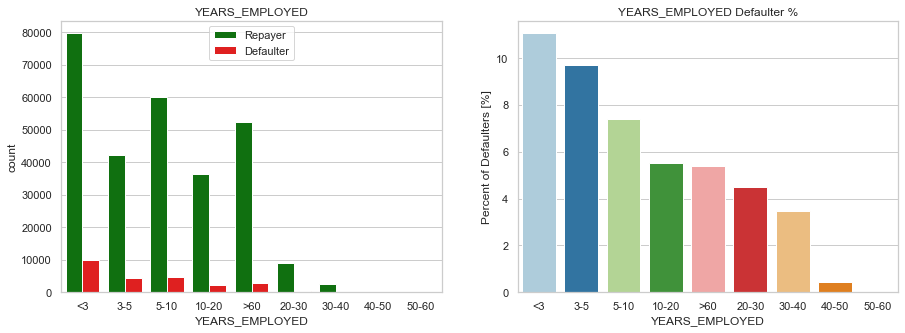

In [1509]:
univariate_categorical('YEARS_EMPLOYED')

COMMENT: 
Those have work experience from < 3 to 5 years default the most, the higher in year_employed the less default.

#3.2.2 category var analysis (bivariate)

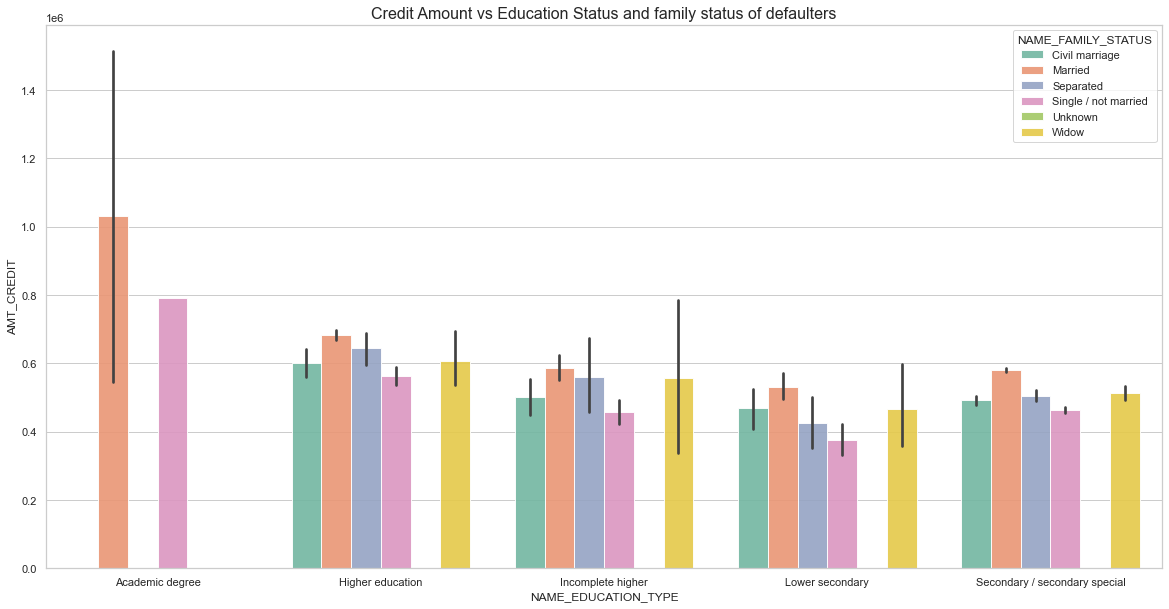

In [1510]:
#

plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=0)
sns.barplot(data =target1, 
            x='NAME_EDUCATION_TYPE',
            y='AMT_CREDIT', 
            hue ='NAME_FAMILY_STATUS',
            alpha=.9,
            palette='Set2')

plt.title('Credit Amount vs Education Status and family status of defaulters',fontsize = 16)
plt.show()

Comment: 
Overall married defaulter has highest number of credit than other and highest in academic degree

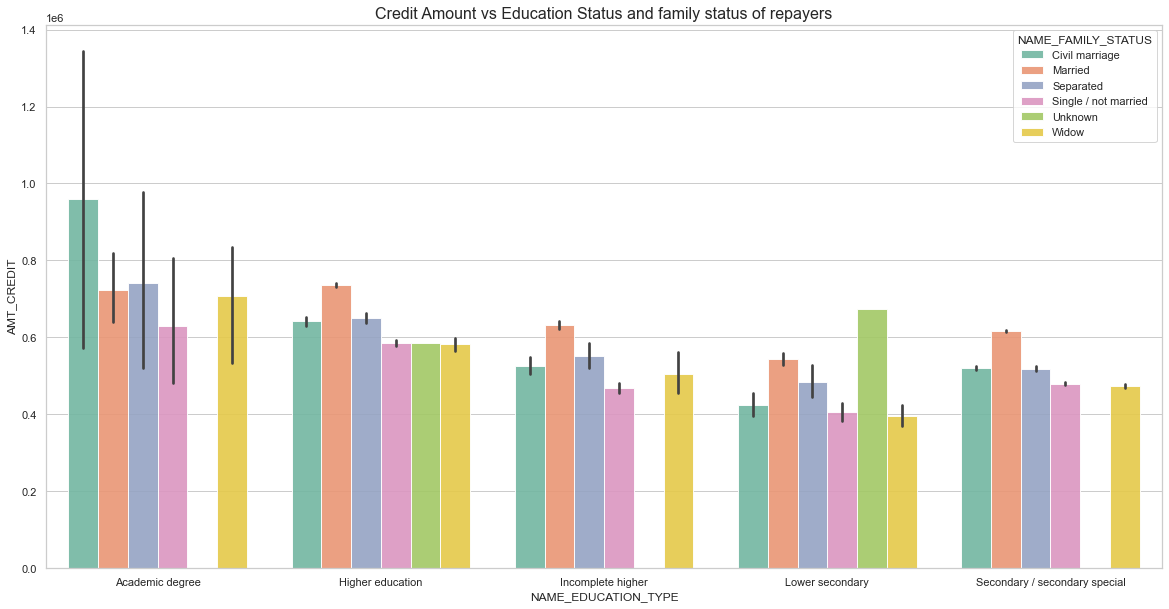

In [1511]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=0)
sns.barplot(data =target0, 
            x='NAME_EDUCATION_TYPE',
            y='AMT_CREDIT', 
            hue ='NAME_FAMILY_STATUS',
            alpha=.9,
            palette='Set2')

plt.title('Credit Amount vs Education Status and family status of repayers',fontsize = 16)
plt.show()

comment:
while in repayers, civil marriage has highest number of credit in academic degree

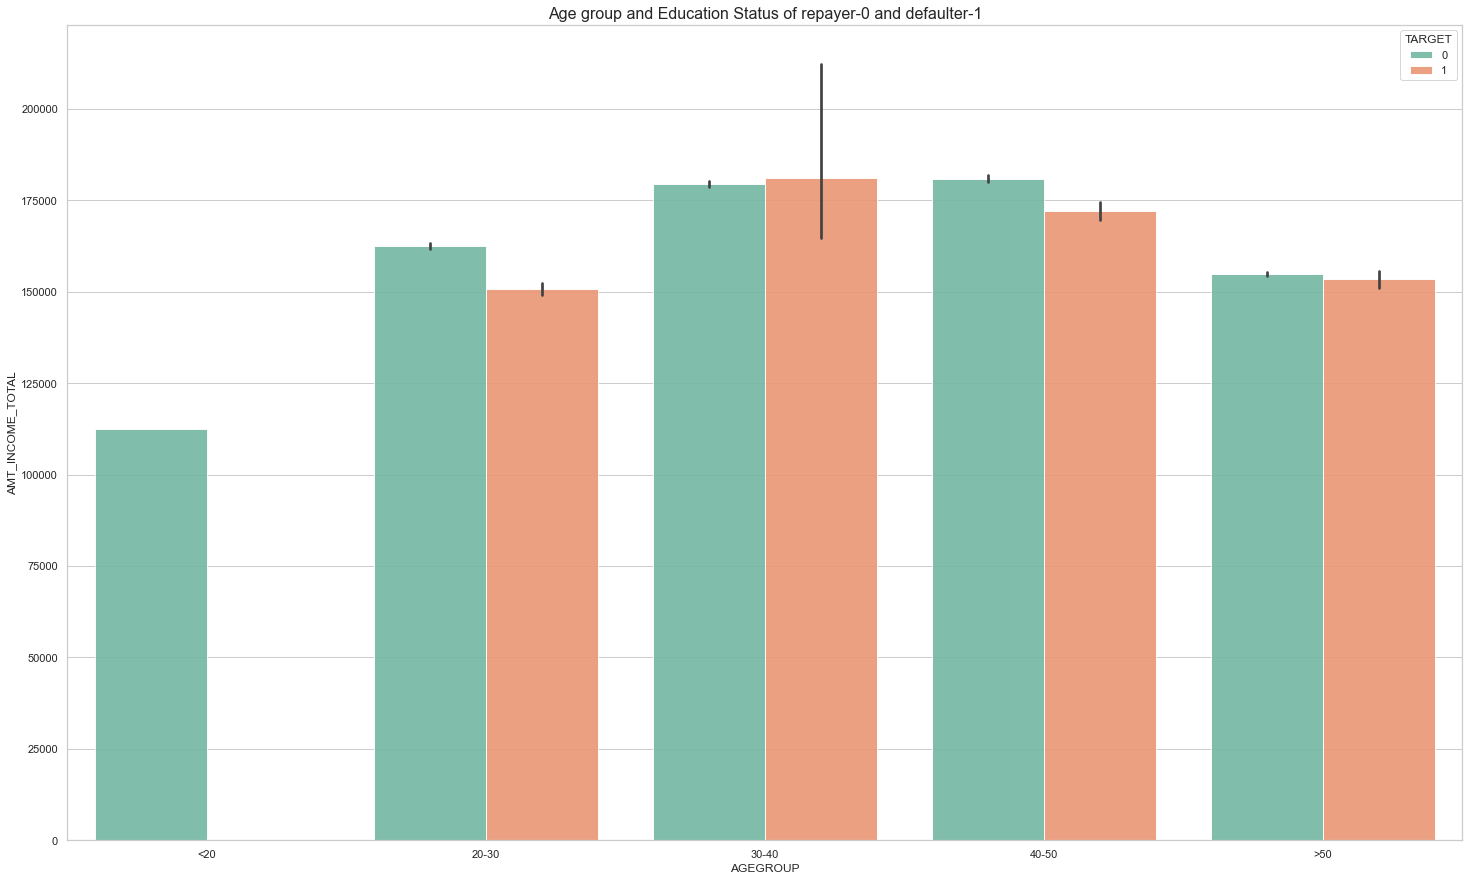

In [1527]:
plt.figure(figsize=(25,15))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=0)
sns.barplot(data =dfa1, 
            x='AGEGROUP',
            y='AMT_INCOME_TOTAL', 
            hue ='TARGET',
            alpha=.9,
            palette='Set2')
plt.title('Age group and Education Status of repayer-0 and defaulter-1',fontsize = 16)
plt.show()

comment:

most customers are in their 30-50. In 30-40 range defaulters are higher than repayers and highest in all range eventhough their income are higher than other range, we need to take some action to improve these and take closer look at range 30-40.

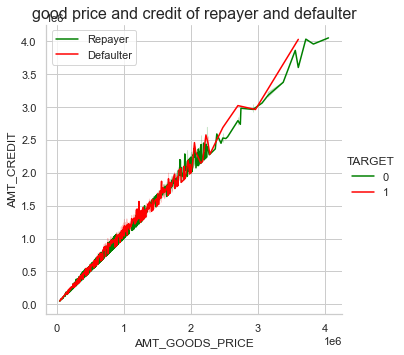

In [1513]:
sns.relplot(data =dfa1, 
            y='AMT_CREDIT',
            x='AMT_GOODS_PRICE', 
            hue ='TARGET',
            kind='line',
            palette = ['green','red'],)
plt.title('good price and credit of repayer and defaulter',fontsize = 16)
plt.legend(['Repayer','Defaulter'])


COMMENT:

when the good price > 2,5 there are more defaulters than repayers

#3.3 Numberic var analysis

In [1514]:

target00=target0[[ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE']]
target01=target1[[ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE']]

In [1515]:
#check top 10 correlation in repayer
corr0 = target00.corr()
corrdf = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
348,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
98,AMT_GOODS_PRICE,AMT_CREDIT,0.99
249,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
192,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
373,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
99,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
74,AMT_ANNUITY,AMT_CREDIT,0.77
557,AGE,DAYS_EMPLOYED,0.63
73,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
97,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35


In [1516]:
#check top 10 correlation in defaulter
corr1 = target00.corr()
corrdf = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
348,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
98,AMT_GOODS_PRICE,AMT_CREDIT,0.99
249,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
192,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
373,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
99,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
74,AMT_ANNUITY,AMT_CREDIT,0.77
557,AGE,DAYS_EMPLOYED,0.63
73,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
97,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35


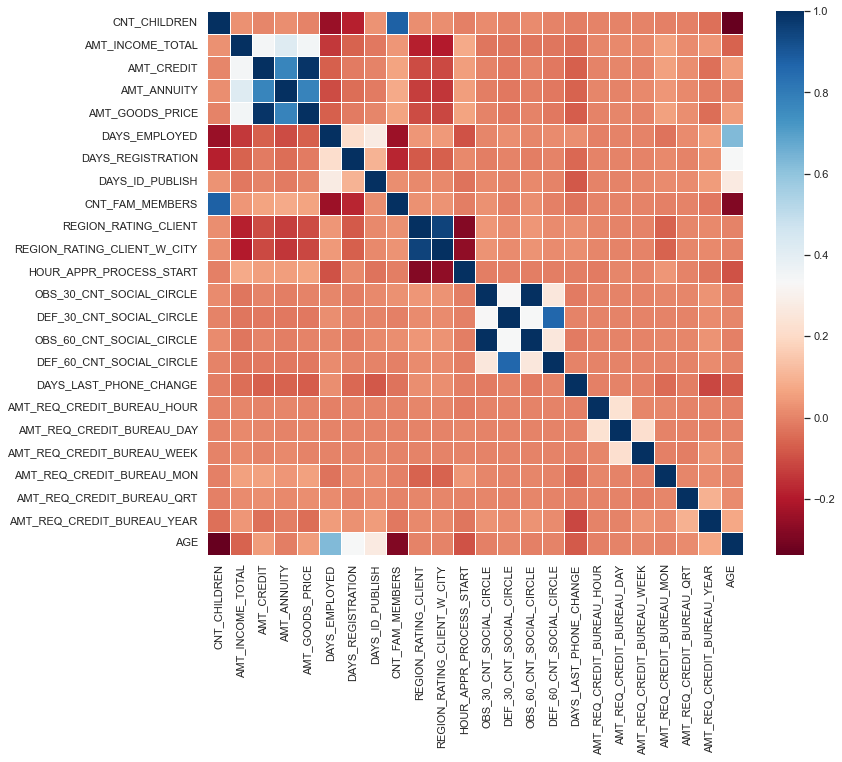

In [1517]:
#corr of repayer
plt.figure(figsize=(12,10))
sns.heatmap(target00.corr(), cmap="RdBu",linewidth =0.5)
plt.show()

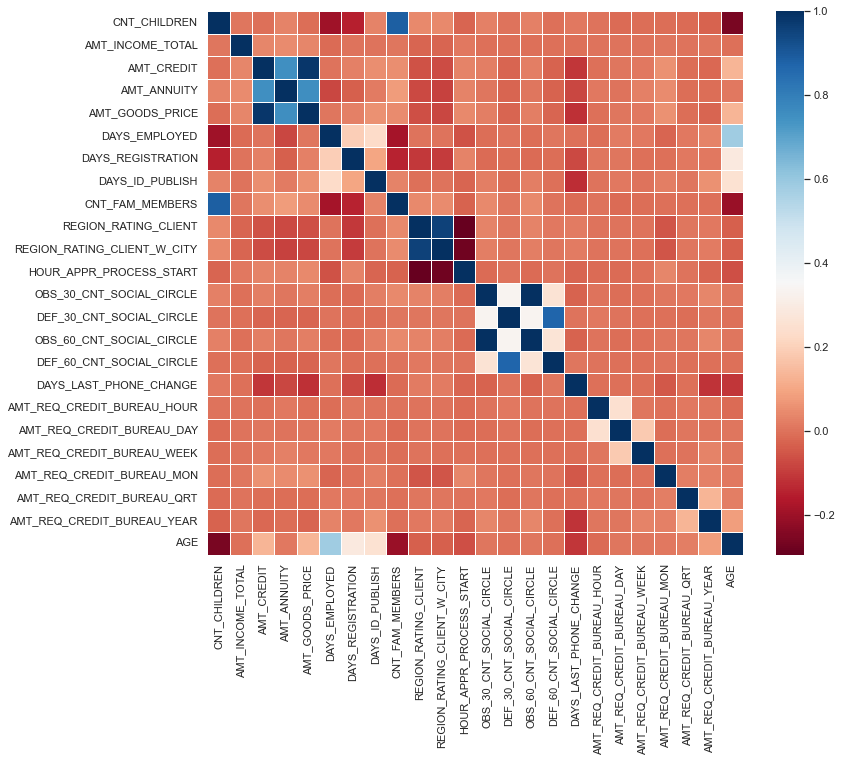

In [1518]:
#corr of defaulters
plt.figure(figsize=(12,10))
sns.heatmap(target01.corr(), cmap="RdBu",linewidth =0.5)
plt.show()

#comment: 

the correlation in both defaulters and repayers are quite the same. AMT_CREDIT corr high with AMT_GOODS_PRICE, AMT_ANNUITY. OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE has corr = 1.00

In [1519]:
dfp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

#3.4 Merge 2 datasets

In [1520]:

loan= pd.merge(dfa1,dfp1, how='inner', on='SK_ID_CURR')
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [1521]:
loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,"1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,608.00","1,412,493.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,700.00","1,413,701.00","1,413,701.00","1,413,701.00","1,413,701.00"
mean,"278,481.29",0.09,0.40,"173,316.04","587,553.67","27,017.02","527,718.59","16,321.05","72,663.47","5,003.23","3,034.56",2.15,2.06,2.04,11.98,1.54,0.15,1.52,0.11,"-1,084.70",0.01,0.01,0.03,0.27,0.32,2.69,44.21,"1,922,744.33","12,884.49","175,243.59","196,354.09","185,439.55",880.37,314.99,12.56
std,"102,811.79",0.28,0.72,"198,573.37","384,917.33","13,951.16","353,246.49","4,344.56","143,337.36","3,551.05","1,507.38",0.90,0.50,0.49,3.23,2.53,0.47,2.51,0.38,799.94,0.08,0.10,0.20,0.93,0.88,2.16,11.90,"532,715.34","14,181.13","293,622.19","319,481.25","288,124.37",783.54,"7,695.08",14.49
min,"100,002.00",0.00,0.00,"25,650.00","45,000.00","1,615.50","40,500.00","7,489.00",0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,"-4,292.00",0.00,0.00,0.00,0.00,0.00,0.00,20.00,"1,000,001.00",0.00,0.00,0.00,0.00,1.00,-1.00,0.00
25%,"189,364.00",0.00,0.00,"112,500.00","270,000.00","16,821.00","238,500.00","12,739.00","1,042.00","2,001.00","1,783.00",2.00,2.00,2.00,10.00,0.00,0.00,0.00,0.00,"-1,683.00",0.00,0.00,0.00,0.00,0.00,1.00,34.00,"1,461,346.00","2,461.95","19,750.50","24,880.50","45,000.00",271.00,-1.00,0.00
50%,"278,992.00",0.00,0.00,"157,500.00","508,495.50","24,925.50","450,000.00","16,044.00","2,401.00","4,508.00","3,330.00",2.00,2.00,2.00,12.00,0.00,0.00,0.00,0.00,"-1,011.00",0.00,0.00,0.00,0.00,0.00,2.00,43.00,"1,922,698.00","8,250.39","70,870.50","80,595.00","70,875.00",582.00,4.00,10.00
75%,"367,556.00",0.00,1.00,"207,000.00","807,984.00","34,542.00","679,500.00","19,980.00","6,313.00","7,510.00","4,319.00",3.00,2.00,2.00,14.00,2.00,0.00,2.00,0.00,-396.00,0.00,0.00,0.00,0.00,0.00,4.00,54.00,"2,384,012.00","16,747.97","180,000.00","215,640.00","180,000.00","1,313.00",85.00,18.00
max,"456,255.00",1.00,19.00,"117,000,000.00","4,050,000.00","225,000.00","4,050,000.00","25,201.00","365,243.00","24,672.00","7,197.00",20.00,3.00,3.00,23.00,348.00,34.00,344.00,24.00,0.00,4.00,9.00,8.00,27.00,261.00,25.00,69.00,"2,845,381.00","418,058.15","5,850,000.00","4,509,688.50","5,850,000.00","2,922.00","4,000,000.00",84.00


In [1522]:
#devide 'loan' to repayer and defaulter:
# Repayers
loan0 = loan[loan['TARGET']==0]
# Defaulters
loan1= loan[loan['TARGET']==1]

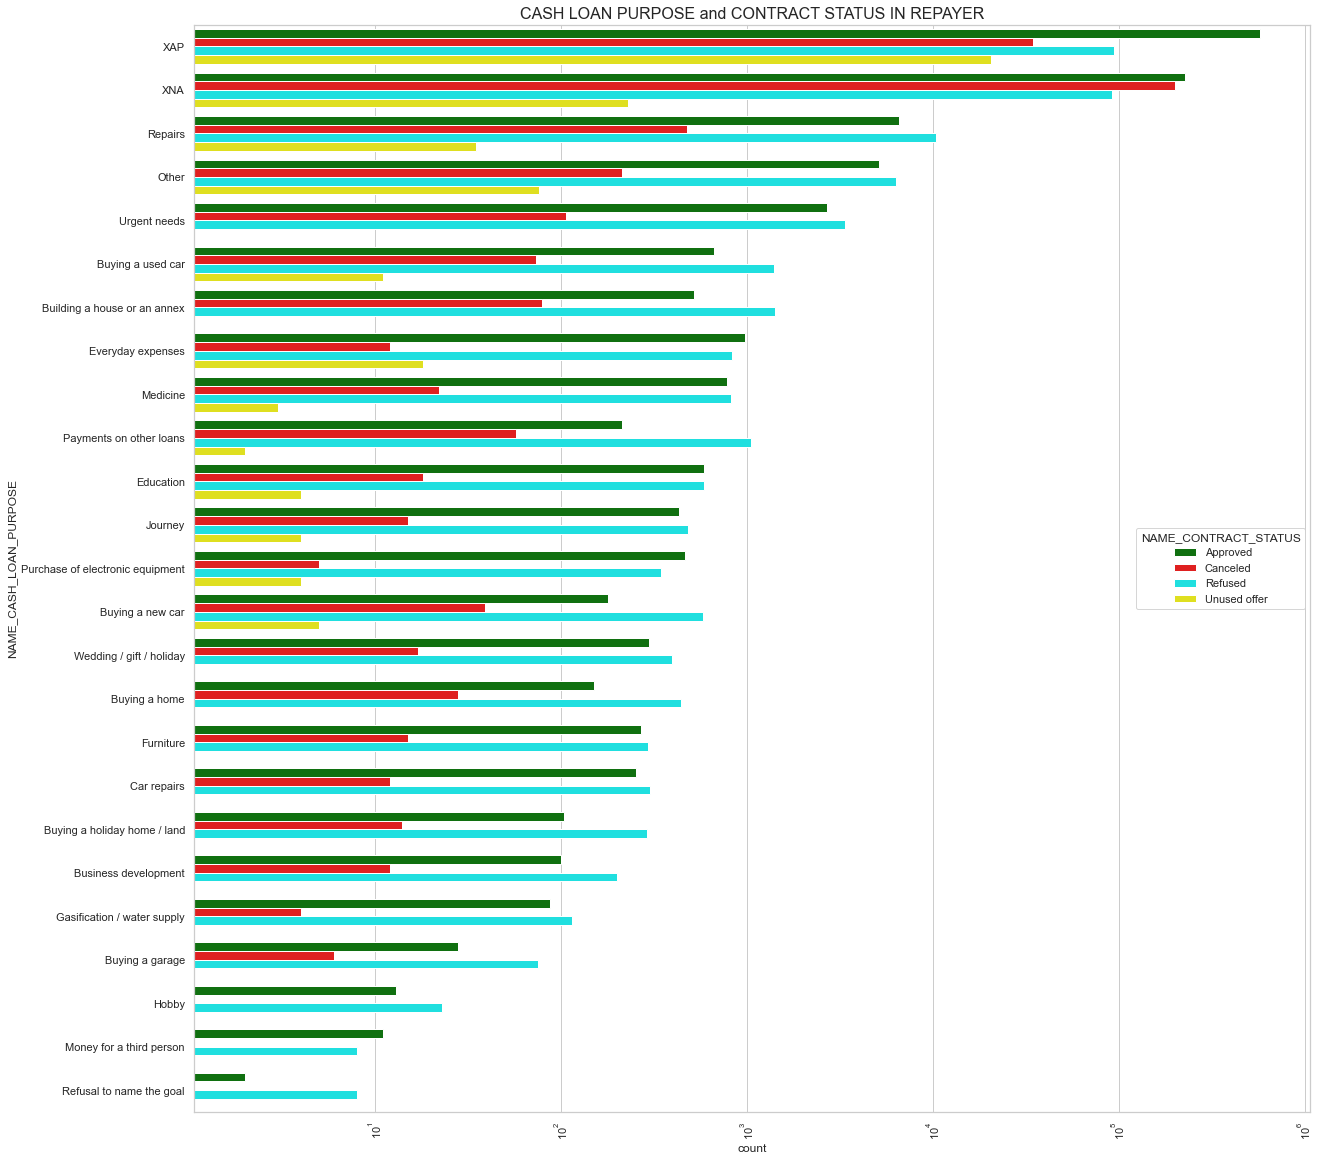

In [1523]:
plt.figure(figsize=(20,20))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data =loan0, 
            y='NAME_CASH_LOAN_PURPOSE',
            hue ='NAME_CONTRACT_STATUS',
            order= loan0['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
            palette=['green','red','aqua','yellow'])
plt.title('CASH LOAN PURPOSE and CONTRACT STATUS IN REPAYER',fontsize = 16)
plt.show()

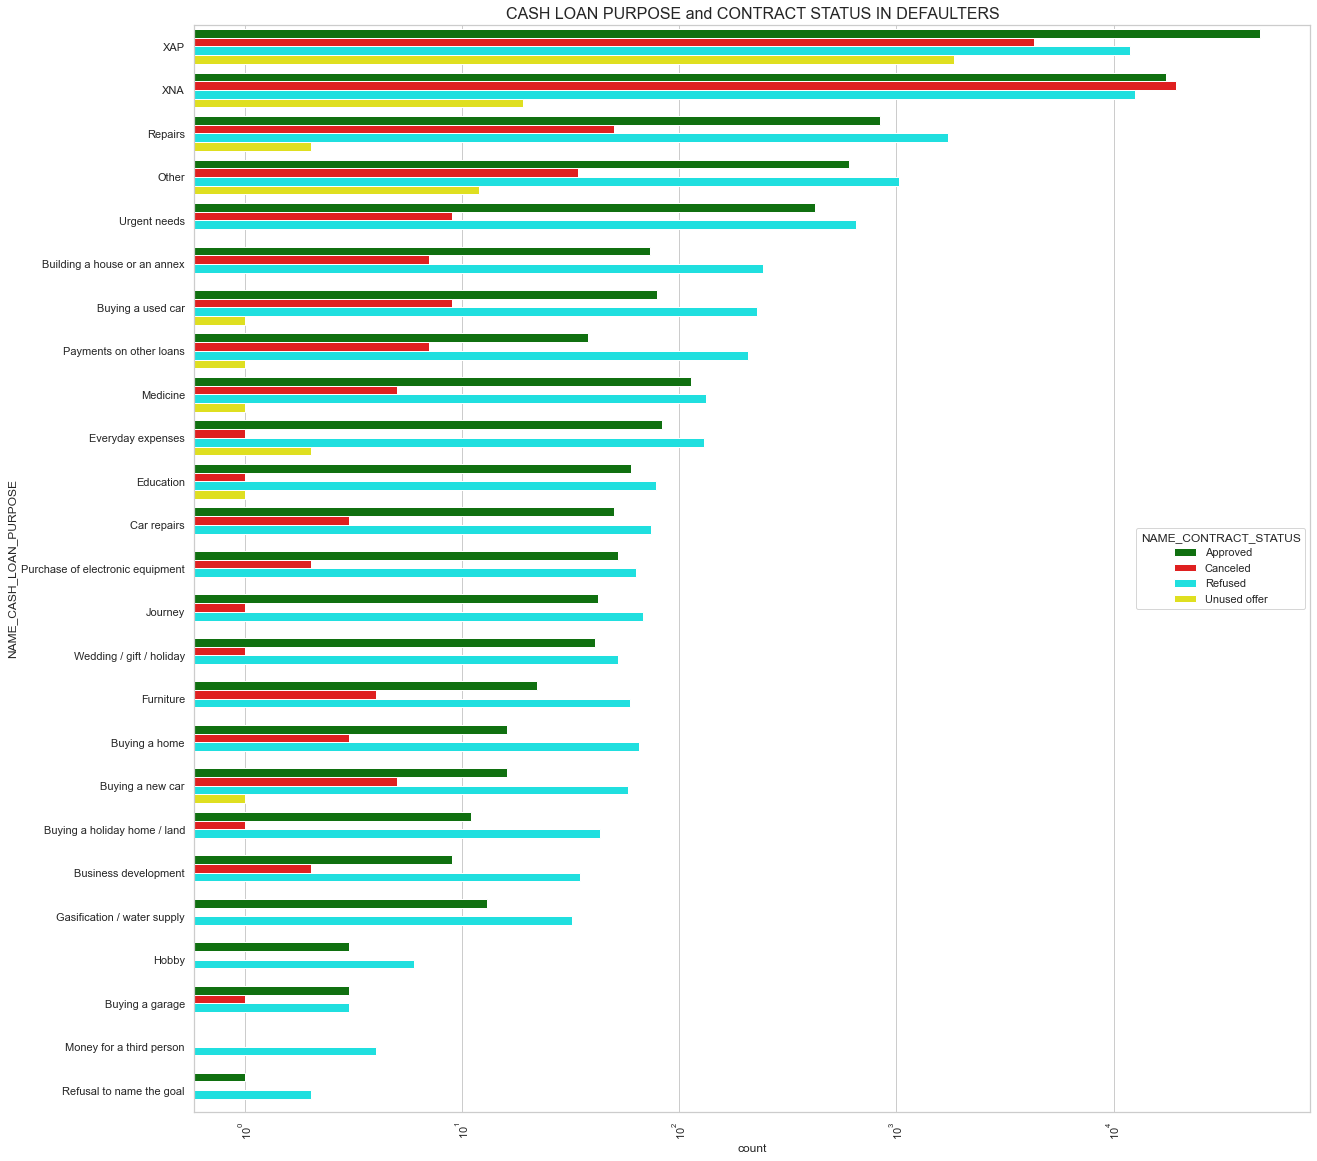

In [1524]:
plt.figure(figsize=(20,20))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data =loan1, 
            y='NAME_CASH_LOAN_PURPOSE',
            hue ='NAME_CONTRACT_STATUS',
            order= loan1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
            palette=['green','red','aqua','yellow'])
plt.title('CASH LOAN PURPOSE and CONTRACT STATUS IN DEFAULTERS',fontsize = 16)
plt.show()

comment: 
Loan purpose xna and xnp has high value in defaulters which is unknown values, then come to repair, seem to have the highest number of cancel and refuse, also approve-> which means they are highest in risk. urgen need, buy house, buy car is next in the list for high risk. same info above for both repayer and defaulter

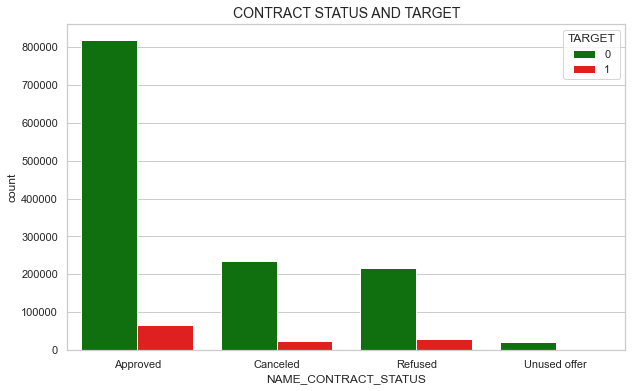

In [1525]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=0)
sns.countplot(data =loan, 
            hue='TARGET',
            
            x='NAME_CONTRACT_STATUS',
            palette=['green','red'])
plt.title('CONTRACT STATUS AND TARGET',fontsize = 14)
plt.show()

In [1526]:
#calculate the percentage of each pervious status / target 
a=loan.groupby(by='NAME_CONTRACT_STATUS')['TARGET']
g=a.value_counts()
b=pd.concat([g,round(a.value_counts(normalize= True)*100,2)], axis=1, keys=('Total contract','percentage'))
b['percentage']=b['percentage'].astype(str)+'%'
b

Total contract percentage
NAME_CONTRACT_STATUS TARGET                           
Approved             0               818856     92.41%
                     1                67243      7.59%
Canceled             0               235641     90.83%
                     1                23800      9.17%
Refused              0               215952      88.0%
                     1                29438      12.0%
Unused offer         0                20892     91.75%
                     1                 1879      8.25%

Comment: 
the plot show that plenty of previous canceled customers now are repayers (90.83%), also customers who refused loans (88%). we should recheck those applications to find out why those got canceled/refused back then.

# 4. Conclusion

To reduce defaulters, the bank should take closer look to these aspects:
1.CODE_GENDER: Women has higher rate of being repayers 
2.NAME_CONTRACT_TYPE : Pay more attention to cash loan than other, as its defaulter =50% of repayers
3.NAME_INCOME_TYPE, NAME_EDUCATION_TYPE: Secondary and lower tend to pay late than other, also those who are still working are most likely to be repayers, should not approve to unemployed or maternity leave.
4.NAME_HOUSING_TYPE: those live in rental apartment and with parents has high rate of not paying loan
5.CNT_FAM_MEMBERS, CNT_CHILDREN: customers who has many family members and has more children  are more to have difficulty to pay loan, those has more than 9 kids and 11 family members are 100% default
6.REGION_RATING: region rating  2 has more repayers than other but region rating 3 should be concerned as they has highest default ratio
7.NAME_FAMILY_STATUS: civil marriage, single customers default the most, mosts of repay customers are married
8.AGEGROUP: customers in age group 20-40 more to be default even though they have higher income than others.
9.OCCUPATION: Low skill labor, driver, waiter, sercurity staff, cooking staff, cleaning staff and those work in transport,industry has higher rate to be default
10.NAME_CASH_LOAN_PURPOSE: repairs default the most of all, then come to buy house/car , they also have high amount of rejected application
11.90.83% of previous rejected customers and 88% of customers who previous refused loans are now have high rate of repayers, we should recheck these sectors to find out if any problems can be resolve as these might be potential customers